In [1]:
import multiprocessing
import numpy as np
import xarray as xr
import os
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import linregress
from scipy.optimize import curve_fit
from pymer4.models import Lmer
import math
import seaborn as sns

In [9]:
data2 = pd.read_csv('./Q10_site_year_nighttime.csv')

site_id = []
Q10_ls = []
cor_ls = []

m,n = data2.shape
for i in range(m):
    if data2['site'][i] not in site_id and np.isnan(data2['cor'][i])!=1:
        site_id.append(data2['site'][i])
        Q10_ls.append(data2['Q10'][i])
        cor_ls.append(data2['cor'][i])

Q10 = data2['Q10'].values
cor = data2['cor'].values
Q10_1 = Q10[( np.isnan(cor)!=1 )]
cor_1 = cor[( np.isnan(cor)!=1 )]

In [10]:
data2 = pd.read_csv('./Q10_site_year_nighttime.csv')

igbp = ['CRO', 'CSH', 'DBF', 'EBF', 'ENF', 'GRA', 'MF', 'OSH', 'SAV', 'WET', 'WSA']
percentage = []

for i in range(len(igbp)):
    m = len(data2['cor'][(data2['igbp'] == igbp[i]) & (np.isnan(data2['cor']) != 1)])
    m1 = len(data2['cor'][(data2['igbp'] == igbp[i]) & (data2['cor'] < -0.5)])
    m2 = len(data2['cor'][(data2['igbp'] == igbp[i]) & (data2['cor'] >= -0.5) & (data2['cor'] < 0)])
    m3 = len(data2['cor'][(data2['igbp'] == igbp[i]) & (data2['cor'] >= 0) & (data2['cor'] < 0.5)])
    m4 = len(data2['cor'][(data2['igbp'] == igbp[i]) & (data2['cor'] >= 0.5)])
    
    percentagei = [m1/m*100, m2/m*100, m3/m*100, m4/m*100]
    percentage.append(percentagei)
percentage = np.array(percentage)  #行以生态系统分类，列以cor分类

In [5]:
m4 = len(data2['cor'][ (data2['cor'] >= 0.5)])
m = len(data2['cor'][(np.isnan(data2['cor']) != 1)])
print(m4/m)
print(m)

0.5787375415282392
1505


Text(-0.2, 1.05, 'b')

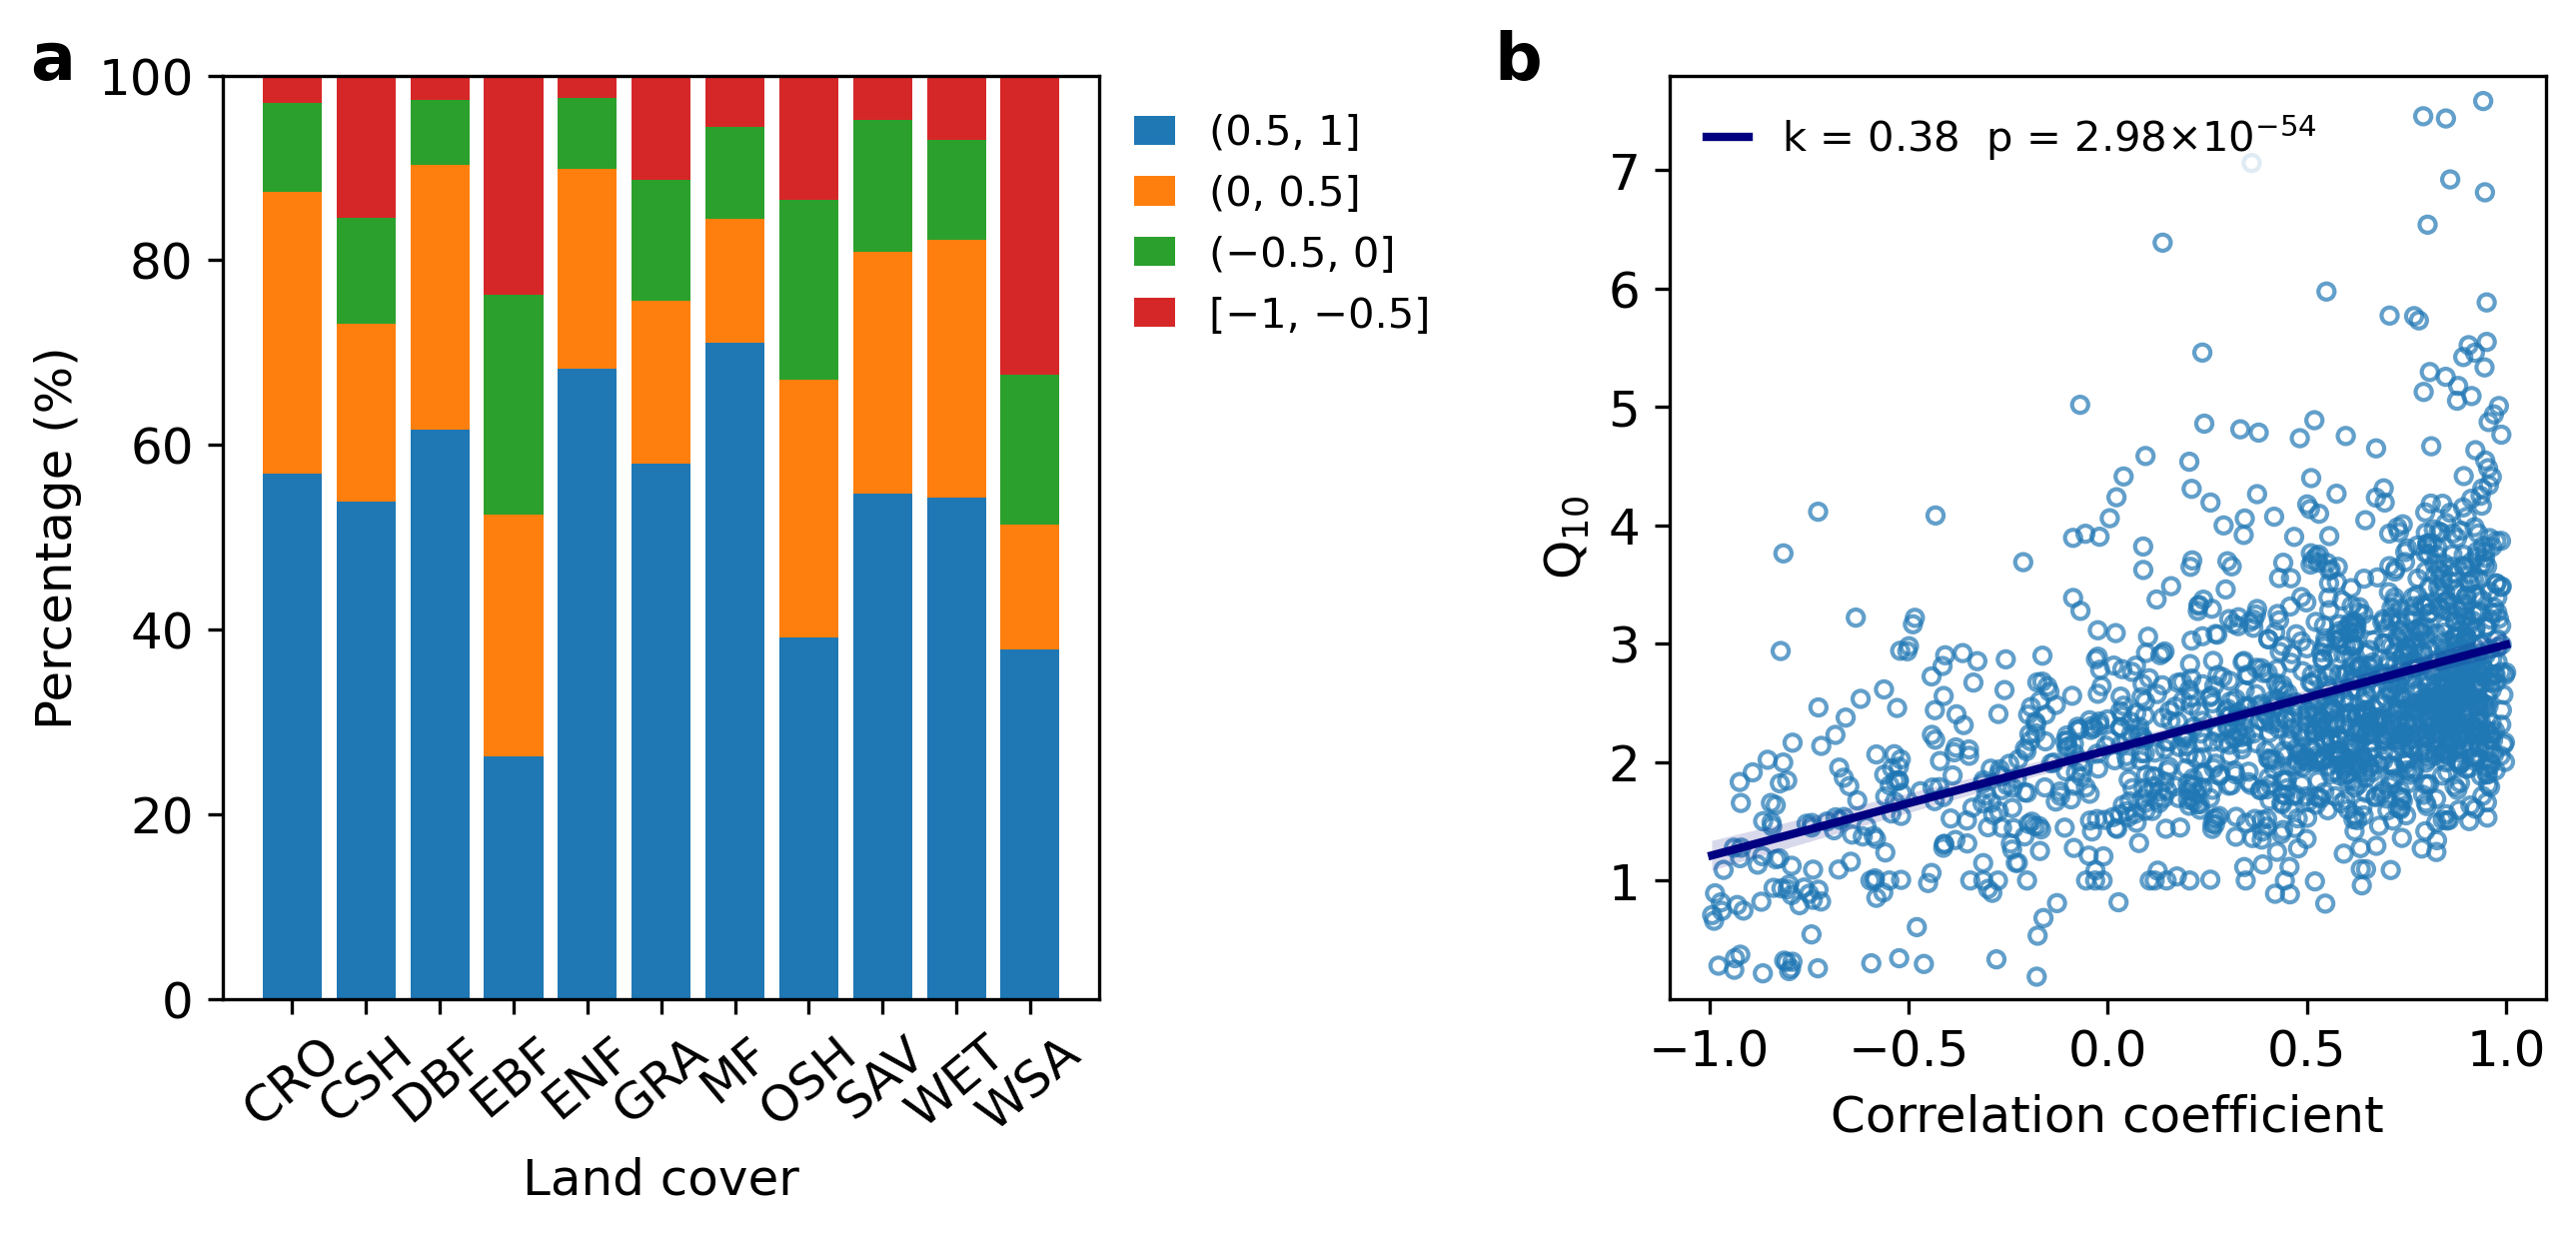

In [11]:
fig = plt.figure(figsize=(10, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.65, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8



###########################################################################################################################################
ax3 = fig.add_subplot(1,2,1)
colors = ['#2F7FC1', '#F3D266', '#D76364', '#B1CE46']
ax3.bar(igbp, percentage[...,3], label= '(0.5, 1]', width=0.8,)# color=colors[0])
ax3.bar(igbp, percentage[...,2], bottom=percentage[...,3], label= '(0, 0.5]', width=0.8,)# color=colors[1])
ax3.bar(igbp, percentage[...,1], bottom=percentage[...,3]+percentage[...,2], label= '(\u22120.5, 0]', width=0.8,)# color=colors[2])
ax3.bar(igbp, percentage[...,0], bottom=percentage[...,3]+percentage[...,2]+percentage[...,1], label= '[\u22121, \u22120.5]',)# width=0.8, color=colors[3])

ax3.set_xlabel('Land cover',size = 12)
ax3.set_ylabel('Percentage (%)',size = 12)
ax3.tick_params(axis='x', labelsize=12, rotation=40)
ax3.tick_params(axis='y', labelsize=12)

ax3.legend(fontsize=10, edgecolor='white', loc=[1.02, 0.7], frameon=True, handlelength = 1)
ax3.text(-0.22, 1.05, "a", transform=ax3.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax3.set_ylim(0,100)


#########################################################################################################################################
cmap = 'viridis'
ax2 = fig.add_subplot(1,2,2)

ax2.scatter(cor_1, Q10_1, s=15, marker= 'o', edgecolor='tab:blue', facecolor='none', alpha=0.7)
sns.regplot(x=cor_1, y=Q10_1, ci=95, color='navy', scatter= False, line_kws={'linewidth':2}, label = 'k = 0.38  p = 2.98×10$^{\u221254}$')
x = cor_1
y = Q10_1
X = sm.add_constant(x)
# 拟合线性回归模型
model = sm.OLS(y, X)
results = model.fit()
# 获取斜率和斜率的标准误差
slope = results.params[1]
p_value = results.pvalues[1]

ax2.set_xlabel('Correlation coefficient',size = 12)
ax2.set_ylabel('Q$_{10}$',size = 12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

ax2.set_xlim(-1.1,1.1);
ax2.set_ylim(0,7.8);
ax2.set_xticks(np.linspace(-1,1,5))
ax2.set_yticks(np.linspace(1,7,7))

ax2.legend(fontsize=10, edgecolor='white', loc='upper left', frameon=True, handlelength = 1)
ax2.text(-0.20, 1.05, "b", transform=ax2.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
#ax2.axhline(y=2,ls="--",linewidth=1,c="black", zorder=2)

In [19]:
cor_1 = np.array(cor_1) 
Q10_1 = np.array(Q10_1)
Q10_1_neg = Q10_1[(cor_1>0.9)]

In [20]:
np.mean(Q10_1_neg), np.std(Q10_1_neg)

(2.9983359623563093, 0.9774153305860837)

In [42]:
data2 = pd.read_csv('./Cor_climate.csv')

climate0 = ['A', 'B', 'C', 'D', 'E']
climate1 = ['Tropical', 'Arid', 'Temperate', 'Continental', 'Ploar']

percentage = []
climate2 = []
for i in range(len(climate0)):
    m = len(data2['cor'][(data2['climate'] == climate0[i]) & (np.isnan(data2['cor']) != 1)])
    m1 = len(data2['cor'][(data2['climate'] == climate0[i]) & (data2['cor'] < -0.5)])
    m2 = len(data2['cor'][(data2['climate'] == climate0[i]) & (data2['cor'] >= -0.5) & (data2['cor'] < 0)])
    m3 = len(data2['cor'][(data2['climate'] == climate0[i]) & (data2['cor'] >= 0) & (data2['cor'] < 0.5)])
    m4 = len(data2['cor'][(data2['climate'] == climate0[i]) & (data2['cor'] >= 0.5)])
    if m >20:
        percentagei = [m1/m*100, m2/m*100, m3/m*100, m4/m*100]
        percentage.append(percentagei)
        climate2.append(climate1[i])
percentage = np.array(percentage)  #行以生态系统分类，列以cor分类

(0.0, 100.0)

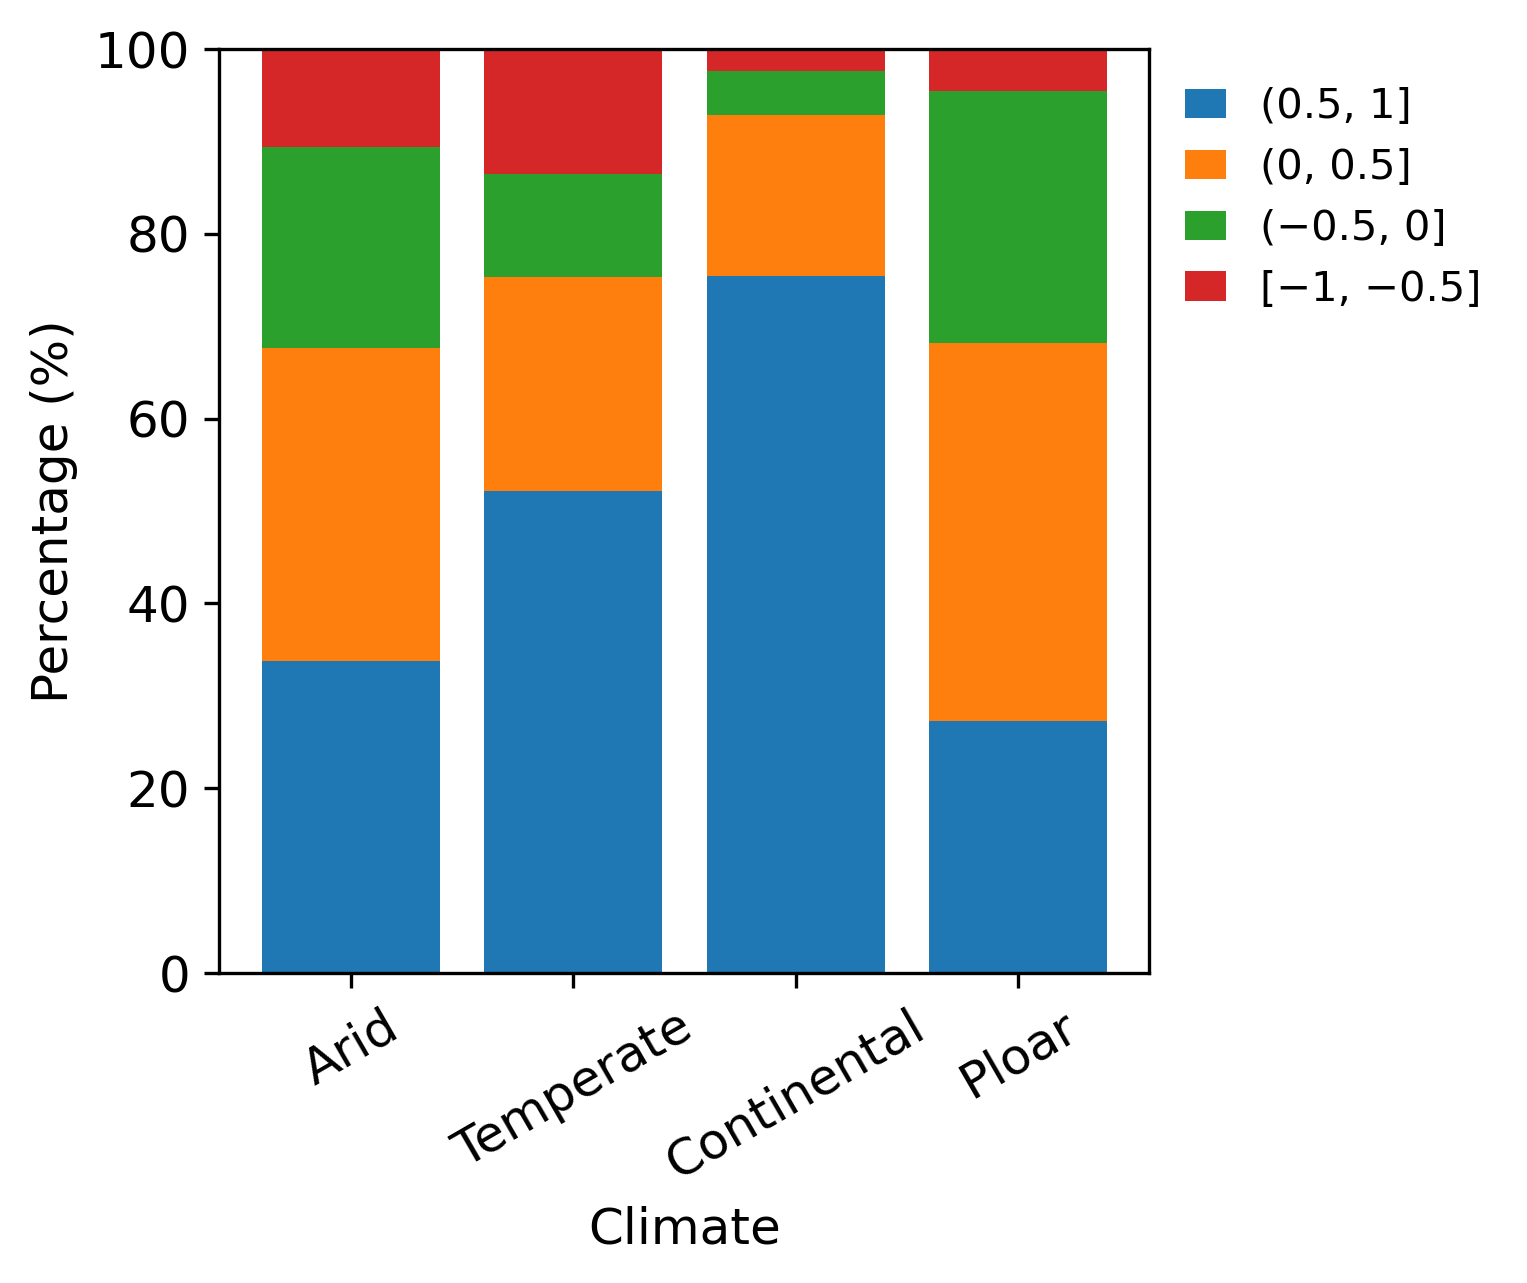

In [43]:
fig = plt.figure(figsize=(4, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.65, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

###########################################################################################################################################
ax3 = fig.add_subplot(1,1,1)
colors = ['#2F7FC1', '#F3D266', '#D76364', '#B1CE46', '#05B9E2']
ax3.bar(climate2, percentage[...,3], label= '(0.5, 1]', width=0.8,)# color=colors[0])
ax3.bar(climate2, percentage[...,2], bottom=percentage[...,3], label= '(0, 0.5]', width=0.8,)# color=colors[1])
ax3.bar(climate2, percentage[...,1], bottom=percentage[...,3]+percentage[...,2], label= '(\u22120.5, 0]', width=0.8,)# color=colors[2])
ax3.bar(climate2, percentage[...,0], bottom=percentage[...,3]+percentage[...,2]+percentage[...,1], label= '[\u22121, \u22120.5]',)# width=0.8, color=colors[3])

ax3.set_xlabel('Climate',size = 12)
ax3.set_ylabel('Percentage (%)',size = 12)
ax3.tick_params(axis='x', labelsize=12, rotation=30)
ax3.tick_params(axis='y', labelsize=12)

ax3.legend(fontsize=10, edgecolor='white', loc=[1.02, 0.7], frameon=True, handlelength = 1)
ax3.text(-0.22, 1.05, "", transform=ax3.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax3.set_ylim(0,100)
